In [198]:
import os 

project_dir = os.path.dirname(os.path.abspath(os.getcwd()))

In [199]:
import pandas as pd

csv = os.path.join(project_dir, 'data/train.csv')
if not os.path.exists(csv):
    raise FileNotFoundError

df = pd.read_csv(csv, encoding='unicode_escape')
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [200]:
df.isna().sum(), df.duplicated().sum()

(textID              0
 text                1
 selected_text       1
 sentiment           0
 Time of Tweet       0
 Age of User         0
 Country             0
 Population -2020    0
 Land Area (Km²)     0
 Density (P/Km²)     0
 dtype: int64,
 np.int64(0))

In [201]:
df = df.dropna()

In [202]:
df = df[df.columns[1:4]]
df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [203]:
# we dont need selected text as well as we are going to pre-process this data from scratch

df = df.drop(columns=["selected_text"])
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [204]:
df["text"] = df["text"].str.lower()

In [205]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["sentiment"] = le.fit_transform(df["sentiment"])
df.head()

,text,sentiment
0,"i`d have responded, if i were going",1
1,sooo sad i will miss you here in san diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"sons of ****, why couldn`t they put them on t...",0


In [206]:
df["sentiment"].value_counts()

sentiment
1    11117
2     8582
0     7781
Name: count, dtype: int64

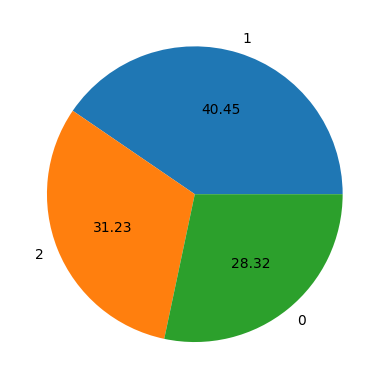

In [207]:
import matplotlib.pyplot as plt

''' 
1 = neutral
2 = positive
0 = negative
'''
plt.pie(df["sentiment"].value_counts(), labels=df["sentiment"].value_counts().index, autopct="%0.2f")
plt.show();

In [208]:
df["chars"] = df["text"].apply(len)

In [209]:
df.head()

,text,sentiment,chars
0,"i`d have responded, if i were going",1,36
1,sooo sad i will miss you here in san diego!!!,0,46
2,my boss is bullying me...,0,25
3,what interview! leave me alone,0,31
4,"sons of ****, why couldn`t they put them on t...",0,75


In [210]:
def get_stats(sentiment_value: int, col_name: str):
    return df[df["sentiment"] == sentiment_value][col_name].describe()

In [211]:
print(" ****** For Negative ****** ")
get_stats(sentiment_value=0, col_name="chars")

 ****** For Negative ****** 


count    7781.000000
mean       70.508803
std        35.175700
min         5.000000
25%        42.000000
50%        66.000000
75%        98.000000
max       147.000000
Name: chars, dtype: float64

In [212]:
print(" ****** For Neutral ****** ")
get_stats(sentiment_value=1, col_name="chars")

 ****** For Neutral ****** 


count    11117.000000
mean        65.239453
std         36.433867
min          3.000000
25%         35.000000
50%         59.000000
75%         94.000000
max        159.000000
Name: chars, dtype: float64

In [213]:
print(" ****** For  Positive ")
get_stats(sentiment_value=2, col_name="chars")

 ****** For  Positive 


count    8582.000000
mean       70.437427
std        34.662597
min         5.000000
25%        42.000000
50%        67.000000
75%        98.000000
max       141.000000
Name: chars, dtype: float64

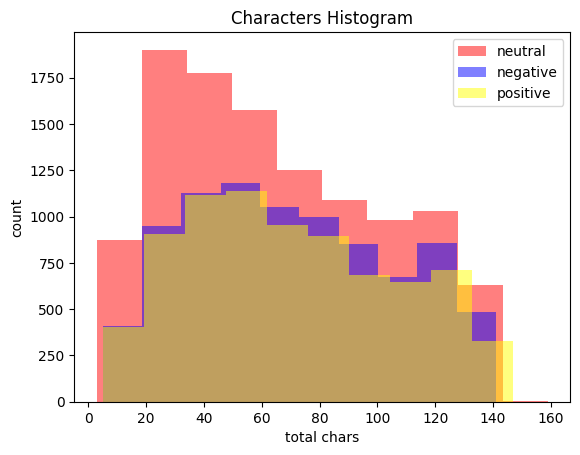

In [214]:
plt.hist(df[df["sentiment"] == 1]["chars"], alpha=.5, color="red", label='neutral')
plt.hist(df[df["sentiment"] == 2]["chars"], alpha=.5, color="blue", label='negative')
plt.hist(df[df["sentiment"] == 0]["chars"], alpha=.5, color="yellow", label='positive')
plt.legend()
plt.title("Characters Histogram")
plt.xlabel("total chars")
plt.ylabel("count")
plt.show();

In [215]:
df["words_total"] = df["text"].apply(lambda x: len(x.split()))
df.head()

,text,sentiment,chars,words_total
0,"i`d have responded, if i were going",1,36,7
1,sooo sad i will miss you here in san diego!!!,0,46,10
2,my boss is bullying me...,0,25,5
3,what interview! leave me alone,0,31,5
4,"sons of ****, why couldn`t they put them on t...",0,75,14


In [216]:
print(" ****** For Negative ****** ")
get_stats(sentiment_value=0, col_name="words_total")

 ****** For Negative ****** 


count    7781.000000
mean       13.473204
std         6.874375
min         1.000000
25%         8.000000
50%        13.000000
75%        19.000000
max        32.000000
Name: words_total, dtype: float64

In [217]:
print(" ****** For Neutral ****** ")
get_stats(sentiment_value=1, col_name="words_total")

 ****** For Neutral ****** 


count    11117.000000
mean        12.343888
std          7.056730
min          1.000000
25%          6.000000
50%         11.000000
75%         18.000000
max         33.000000
Name: words_total, dtype: float64

In [218]:
print(" ****** For Positive ****** ")
get_stats(sentiment_value=2, col_name="words_total")

 ****** For Positive ****** 


count    8582.000000
mean       13.109881
std         6.746352
min         1.000000
25%         8.000000
50%        12.000000
75%        18.000000
max        33.000000
Name: words_total, dtype: float64

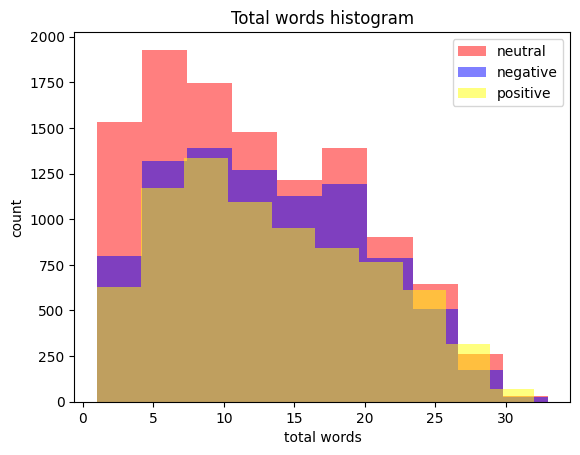

In [219]:
plt.hist(df[df["sentiment"] == 1]["words_total"], alpha=.5, color="red", label='neutral')
plt.hist(df[df["sentiment"] == 2]["words_total"], alpha=.5, color="blue", label='negative')
plt.hist(df[df["sentiment"] == 0]["words_total"], alpha=.5, color="yellow", label='positive')
plt.legend()
plt.title("Total words histogram")
plt.xlabel("total words")
plt.ylabel("count")
plt.show();

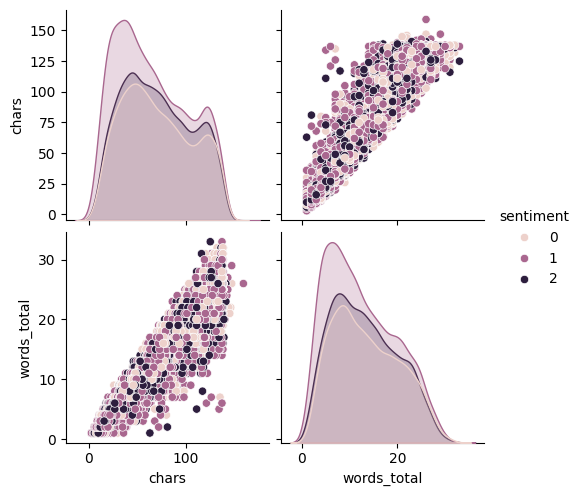

In [220]:
import seaborn as sns

sns.pairplot(df, hue='sentiment')

<Axes: >

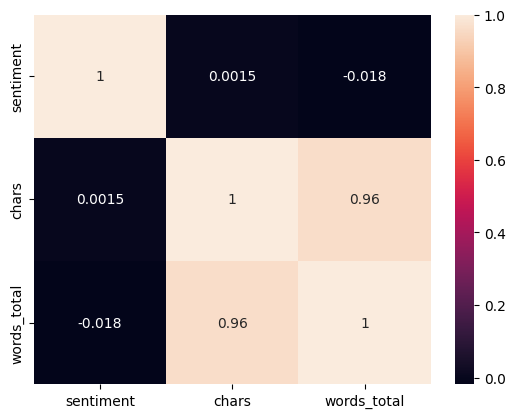

In [221]:
numeric_df = df.drop(columns=['text'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)

In [222]:
# remove html tags if present
import re

def remove_html(col):
    if isinstance(col, str):
        pattern = re.compile(r'<,*?>')
        return pattern.sub('', col)
    else:
        return col
df["text"] = df["text"].apply(remove_html)
df.head(2)

,text,sentiment,chars,words_total
0,"i`d have responded, if i were going",1,36,7
1,sooo sad i will miss you here in san diego!!!,0,46,10


In [223]:
def remove_urls(text):
    if isinstance(text, str):
        pattern = re.compile(r'http://\S+|https://\S+|www\.\S+')
        return pattern.sub('', text)
    else:
        return text
df["text"] = df["text"].apply(remove_urls)

In [224]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def text_transformer(text):
    text = nltk.word_tokenize(text) 
    y = []
    for i in text:
        if i.isalnum() and i not in string.punctuation and i not in stopwords.words('english'):
            y.append(i)
    return ' '.join(y)

In [225]:
text_transformer("Hi! How are you Anishka? I loved the Yt lectures on machine Learning!")

'Hi How Anishka I loved Yt lectures machine Learning'

In [226]:
df["text"] = df["text"].apply(text_transformer)
df.head()

,text,sentiment,chars,words_total
0,responded going,1,36,7
1,sooo sad miss san diego,0,46,10
2,boss bullying,0,25,5
3,interview leave alone,0,31,5
4,sons put releases already bought,0,75,14


In [227]:
from wordcloud import WordCloud

In [228]:
wc = WordCloud(height=500, width=500, background_color="white")

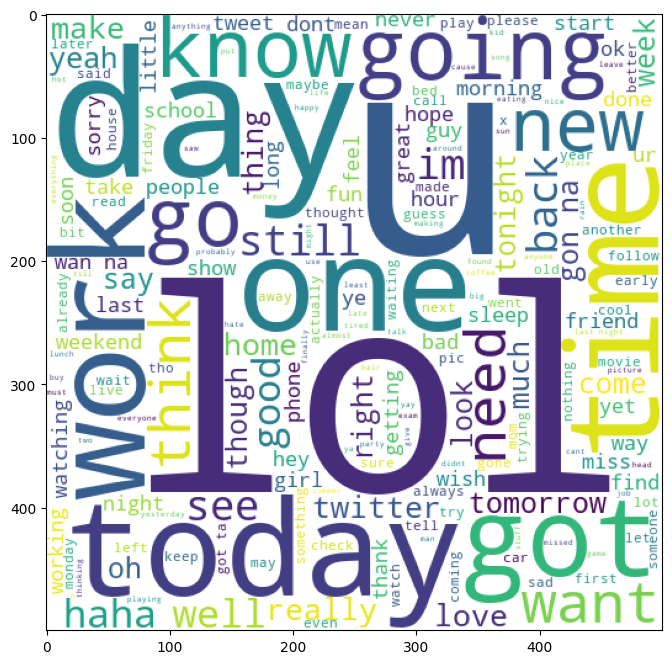

In [229]:
neutral_wc = wc.generate(df[df['sentiment'] == 1]["text"].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(neutral_wc)
plt.show()

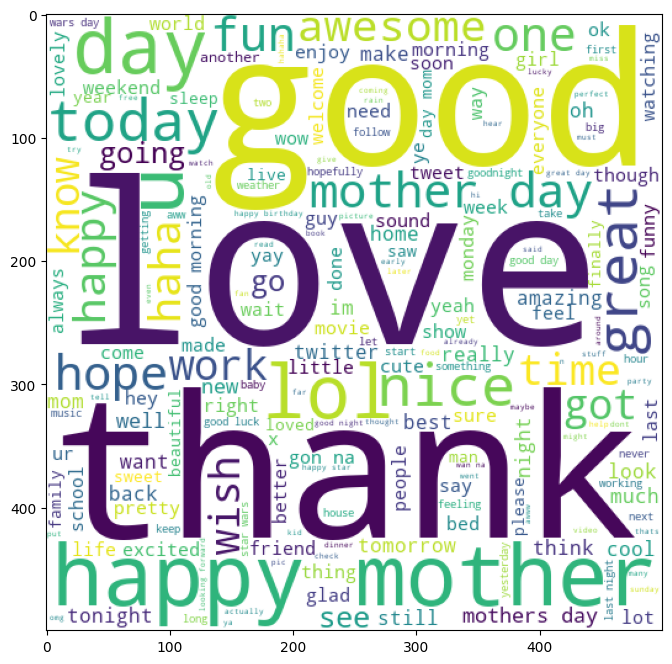

In [230]:
positive_wc = wc.generate(df[df['sentiment'] == 2]["text"].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(positive_wc)
plt.show()

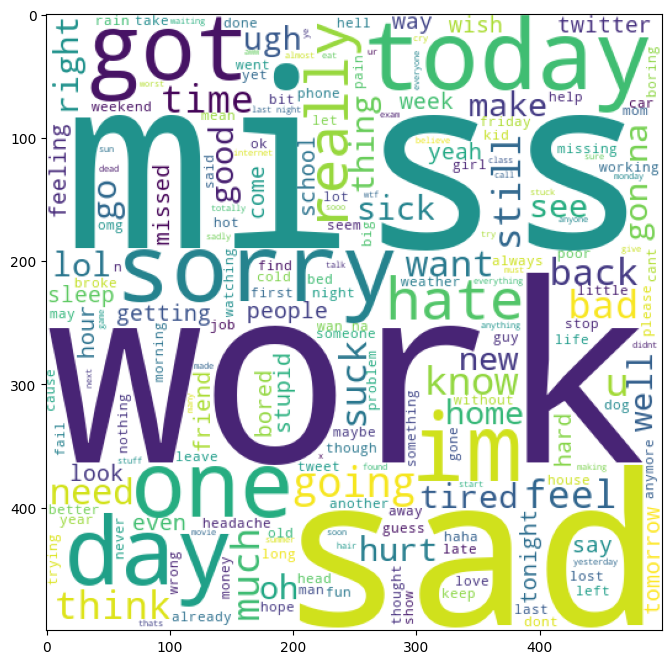

In [231]:
negative_wc = wc.generate(df[df['sentiment'] == 0]["text"].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(negative_wc)
plt.show()

In [232]:
def gen_corpus(sentiment_int: int):
    corpus = []
    for sents in df[df["sentiment"] == sentiment_int]["text"].tolist():
        for words in sents.split():
            corpus.append(words)
    return corpus

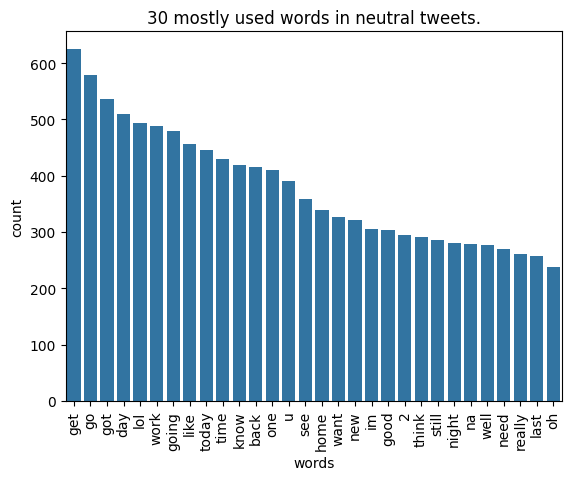

In [233]:
from collections import Counter

common_df = pd.DataFrame(Counter(gen_corpus(sentiment_int=1)).most_common(30), columns=["words", "count"])

sns.barplot(x='words', y='count', data=common_df)
plt.title("30 mostly used words in neutral tweets.")
plt.xticks(rotation='vertical')
plt.show();

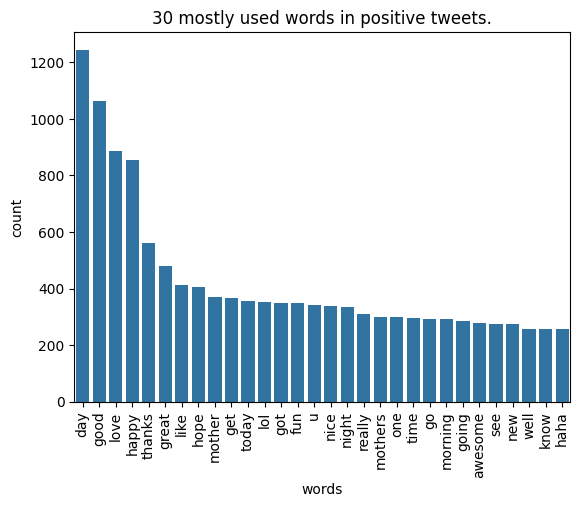

In [234]:
common_df = pd.DataFrame(Counter(gen_corpus(sentiment_int=2)).most_common(30), columns=["words", "count"])

sns.barplot(x='words', y='count', data=common_df)
plt.title("30 mostly used words in positive tweets.")
plt.xticks(rotation='vertical')
plt.show();

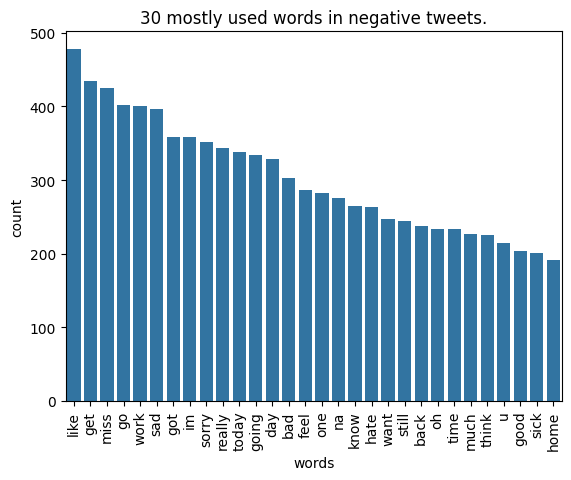

In [235]:
common_df = pd.DataFrame(Counter(gen_corpus(sentiment_int=0)).most_common(30), columns=["words", "count"])

sns.barplot(x='words', y='count', data=common_df)
plt.title("30 mostly used words in negative tweets.")
plt.xticks(rotation='vertical')
plt.show();

In [236]:
df.head()

,text,sentiment,chars,words_total
0,responded going,1,36,7
1,sooo sad miss san diego,0,46,10
2,boss bullying,0,25,5
3,interview leave alone,0,31,5
4,sons put releases already bought,0,75,14
